# Web Scraping using Python
## Largest chemical producers worldwide
_by Virginia Herrero_

The **overall** goal of this project is to scrap from the Wikipedia website the list of largest chemical producers by sales in the year 2021. Clean, explore, analyse and visualize the data obtained. 

**Section 01: Web scraping**
* Obtain the list of largest chemical producers worldwide from Wikipedia.

**Section 02: Data cleaning**
* Clean the data scraped from Wikipedia.
* Rename columns, change data types, convert currency.

**Section 03: Data exploration and analysis**
* Null values
* Duplicates
* Outliers

**Section 04: Data visualization**


## Section 01: Web scraping

In [302]:
# Import all required libraries

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [255]:
# Specify the url
url = r"https://en.wikipedia.org/wiki/List_of_largest_chemical_producers"

In [256]:
# Send a GET request to the url
page = requests.get(url)

In [257]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(page.text, "html")

In [258]:
# Extract the table containing the data needed
table = soup.find("table")
table

<table class="wikitable sortable">
<tbody><tr>
<th>Rank<sup class="reference" id="cite_ref-report2021_4-0"><a href="#cite_note-report2021-4"><span class="cite-bracket">[</span>4<span class="cite-bracket">]</span></a></sup>
</th>
<th style="width:150px;">Company
</th>
<th>Chemical sales in 2021<br/><small>USD millions<style data-mw-deduplicate="TemplateStyles:r1041539562">.mw-parser-output .citation{word-wrap:break-word}.mw-parser-output .citation:target{background-color:rgba(0,127,255,0.133)}</style><sup class="citation nobold" id="ref_note01^"><a href="#endnote_note01^">[A]</a></sup></small>
</th>
<th>Change from 2020<br/><small>in percent</small>
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/BASF" title="BASF">BASF</a>
</td>
<td>92,982
<p><br/>
</p><p><br/>
</p>
</td>
<td><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org

In [259]:
# Extract the titles of the table
titles = table.find_all("th")
titles

[<th>Rank<sup class="reference" id="cite_ref-report2021_4-0"><a href="#cite_note-report2021-4"><span class="cite-bracket">[</span>4<span class="cite-bracket">]</span></a></sup>
 </th>,
 <th style="width:150px;">Company
 </th>,
 <th>Chemical sales in 2021<br/><small>USD millions<style data-mw-deduplicate="TemplateStyles:r1041539562">.mw-parser-output .citation{word-wrap:break-word}.mw-parser-output .citation:target{background-color:rgba(0,127,255,0.133)}</style><sup class="citation nobold" id="ref_note01^"><a href="#endnote_note01^">[A]</a></sup></small>
 </th>,
 <th>Change from 2020<br/><small>in percent</small>
 </th>,
 <th>Headquarters
 </th>]

In [260]:
titles_table = [title.text.strip() for title in titles]
titles_table

['Rank[4]',
 'Company',
 'Chemical sales in 2021USD millions[A]',
 'Change from 2020in percent',
 'Headquarters']

In [261]:
# Create a DataFrame with the scraped titles
df = pd.DataFrame(columns = titles_table)
df

,Rank[4],Company,Chemical sales in 2021USD millions[A],Change from 2020in percent,Headquarters


In [262]:
# Fill the DataFrame with the scraped values
column_data = table.find_all("tr")

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data

DataFrame with all the data scraped from the Wikipedia website:

In [263]:
df

,Rank[4],Company,Chemical sales in 2021USD millions[A],Change from 2020in percent,Headquarters
0,1,BASF,"92,982",32.9%,"Germany, Ludwigshafen am Rhein"
1,2,Sinopec,"65,848",31.9%,"China, Beijing"
2,3,Dow,"54,968",42.6%,"United States, Midland, Michigan"
3,4,SABIC,"43,230",50.1%,"Saudi Arabia, Riyadh"
4,5,Formosa Plastics,"43,173",47.8%,"Taiwan, Taipei"
5,6,Ineos,"39,937",121%,"United Kingdom, London"
6,7,Petrochina,"39,693",41.7%,"China, Beijing"
7,8,LyondellBasell Industries,"38,995",66.6%,"United States, Houston, Texas"
8,9,LG Chem,"37,257",41.8%,"South Korea, Seoul"
9,10,ExxonMobil,"36,858",59.6%,"United States, Spring, Texas"


## Section 02: Data cleaning

* View dataset info

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Rank[4]                                50 non-null     object
 1   Company                                50 non-null     object
 2   Chemical sales in 2021USD millions[A]  50 non-null     object
 3   Change from 2020in percent             50 non-null     object
 4   Headquarters                           50 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [265]:
df.head()

,Rank[4],Company,Chemical sales in 2021USD millions[A],Change from 2020in percent,Headquarters
0,1,BASF,"92,982",32.9%,"Germany, Ludwigshafen am Rhein"
1,2,Sinopec,"65,848",31.9%,"China, Beijing"
2,3,Dow,"54,968",42.6%,"United States, Midland, Michigan"
3,4,SABIC,"43,230",50.1%,"Saudi Arabia, Riyadh"
4,5,Formosa Plastics,"43,173",47.8%,"Taiwan, Taipei"


In [266]:
df.tail()

,Rank[4],Company,Chemical sales in 2021USD millions[A],Change from 2020in percent,Headquarters
45,46,PTT Global Chemical,"16,521",51.7%,"Thailand, Bangkok"
46,47,Sasol,"9,011",10.8%,"South Africa, Johannesburg"
47,48,Tongkun Group,"8,996",28.5%,"China, Tongxiang"
48,49,Lanxess,"8,940",23.8%,"Germany, Cologne"
49,50,Hengyi Petrochemical,"8,858",66.8%,"China, Hangzhou"


* Clean up column names

In [267]:
df = df.rename(columns = {"Rank[4]":"Rank", 
                          "Company":"Company", 
                          "Chemical sales in 2021USD millions[A]":"Sales in 2021 in USD millions", 
                          "Change from 2020in percent":"Growth in 2021 in %", 
                          "Headquarters":"Headquarters"})
df

,Rank,Company,Sales in 2021 in USD millions,Growth in 2021 in %,Headquarters
0,1,BASF,"92,982",32.9%,"Germany, Ludwigshafen am Rhein"
1,2,Sinopec,"65,848",31.9%,"China, Beijing"
2,3,Dow,"54,968",42.6%,"United States, Midland, Michigan"
3,4,SABIC,"43,230",50.1%,"Saudi Arabia, Riyadh"
4,5,Formosa Plastics,"43,173",47.8%,"Taiwan, Taipei"
5,6,Ineos,"39,937",121%,"United Kingdom, London"
6,7,Petrochina,"39,693",41.7%,"China, Beijing"
7,8,LyondellBasell Industries,"38,995",66.6%,"United States, Houston, Texas"
8,9,LG Chem,"37,257",41.8%,"South Korea, Seoul"
9,10,ExxonMobil,"36,858",59.6%,"United States, Spring, Texas"


* Clean up numerical values

In [268]:
def convert_currency(val):
    """
    Removes comma from string parameter and returns it as an integer
    
    Parameter
    ----------
    val : str
        string value of sales in 2021 in USD millions

    Returns
    -------
    new_val : int
        integer value of sales in 2021 in USD millions
    """
    new_val = val.replace(',','')
    return int(new_val)

In [269]:
df["Sales in 2021 in USD millions"] = df["Sales in 2021 in USD millions"].apply(convert_currency)

In [270]:
def convert_percent(val):
    """
    Removes percentage sign from string parameter and returns it as a float round to two decimal places
    
    Parameter
    ----------
    val : str
        string value of growth in 2021 in %

    Returns
    -------
    new_val : int
        float round to two decimal places value of growth in 2021 in %
    """
    new_val = val.replace('%', '')
    return round(float(new_val), 2)

In [271]:
df["Growth in 2021 in %"] = df["Growth in 2021 in %"].apply(convert_percent)

* Change Data Types

In [272]:
df["Rank"] = df["Rank"].astype("int")
df["Sales in 2021 in USD millions"] = df["Sales in 2021 in USD millions"].astype("int")
df["Growth in 2021 in %"] = df["Growth in 2021 in %"].astype("float")

* Replacing data that was transfered with errors

In [273]:
df["Growth in 2021 in %"] = df["Growth in 2021 in %"].replace(18.4, -18.4)
df["Growth in 2021 in %"] = df["Growth in 2021 in %"].replace(2.48, -2.48)

* Check everything is correct

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           50 non-null     int64  
 1   Company                        50 non-null     object 
 2   Sales in 2021 in USD millions  50 non-null     int64  
 3   Growth in 2021 in %            50 non-null     float64
 4   Headquarters                   50 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ KB


* The clean dataset:

In [275]:
df

,Rank,Company,Sales in 2021 in USD millions,Growth in 2021 in %,Headquarters
0,1,BASF,92982,32.90,"Germany, Ludwigshafen am Rhein"
1,2,Sinopec,65848,31.90,"China, Beijing"
2,3,Dow,54968,42.60,"United States, Midland, Michigan"
3,4,SABIC,43230,50.10,"Saudi Arabia, Riyadh"
4,5,Formosa Plastics,43173,47.80,"Taiwan, Taipei"
5,6,Ineos,39937,121.00,"United Kingdom, London"
6,7,Petrochina,39693,41.70,"China, Beijing"
7,8,LyondellBasell Industries,38995,66.60,"United States, Houston, Texas"
8,9,LG Chem,37257,41.80,"South Korea, Seoul"
9,10,ExxonMobil,36858,59.60,"United States, Spring, Texas"


## Section 03: Data Exploration

* Null values

In [276]:
df.isnull().sum().sort_values(ascending = False)

Rank                             0
Company                          0
Sales in 2021 in USD millions    0
Growth in 2021 in %              0
Headquarters                     0
dtype: int64

* Duplicates

In [277]:
df.duplicated().sum()

np.int64(0)

* Outliers

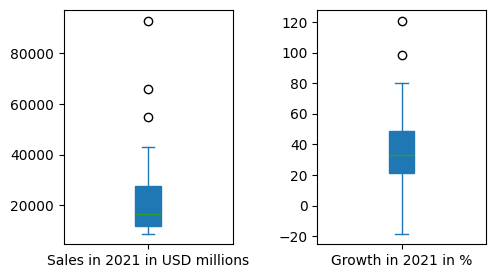

In [278]:
outliers = df.drop(columns =["Company", "Rank"]).select_dtypes(include = np.number)
outliers.plot(subplots=True, layout=(4,4), kind = "box", figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace = 0.5)

* New features: Headquarters column transformation to obtain a Country column

In [279]:
headquarters = df["Headquarters"].str.split(", ", expand = True)
headquarters.columns = ["Country", "City", "None"]
df = pd.concat([df, headquarters], axis = 1)
df = df.drop(columns = ["Headquarters", "City", "None"])
df

,Rank,Company,Sales in 2021 in USD millions,Growth in 2021 in %,Country
0,1,BASF,92982,32.90,Germany
1,2,Sinopec,65848,31.90,China
2,3,Dow,54968,42.60,United States
3,4,SABIC,43230,50.10,Saudi Arabia
4,5,Formosa Plastics,43173,47.80,Taiwan
5,6,Ineos,39937,121.00,United Kingdom
6,7,Petrochina,39693,41.70,China
7,8,LyondellBasell Industries,38995,66.60,United States
8,9,LG Chem,37257,41.80,South Korea
9,10,ExxonMobil,36858,59.60,United States


## Section 04: Data Visualization

* Sales distribution by company

Text(0.5, 1.0, 'Sales distribution by company in 2021')

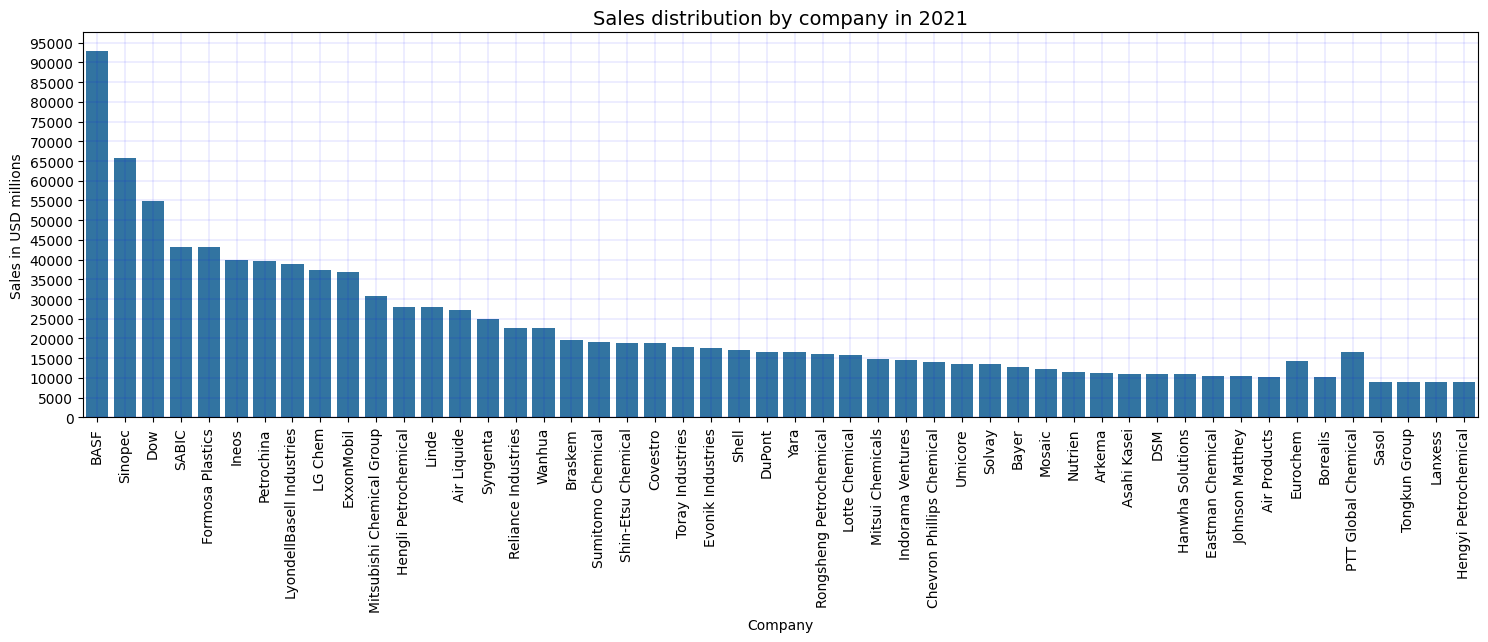

In [280]:
sales_distribution_graph = plt.figure(figsize=(18, 5))
sns.barplot(data = df, x = "Company", y = "Sales in 2021 in USD millions")
plt.grid(color = "b", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Sales in USD millions")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,100000,5000))
plt.title("Sales distribution by company in 2021", size = 14)

* Top 5 best selling chemical companies in 2021

Text(0.5, 1.0, 'Top 5 best selling chemical companies in 2021')

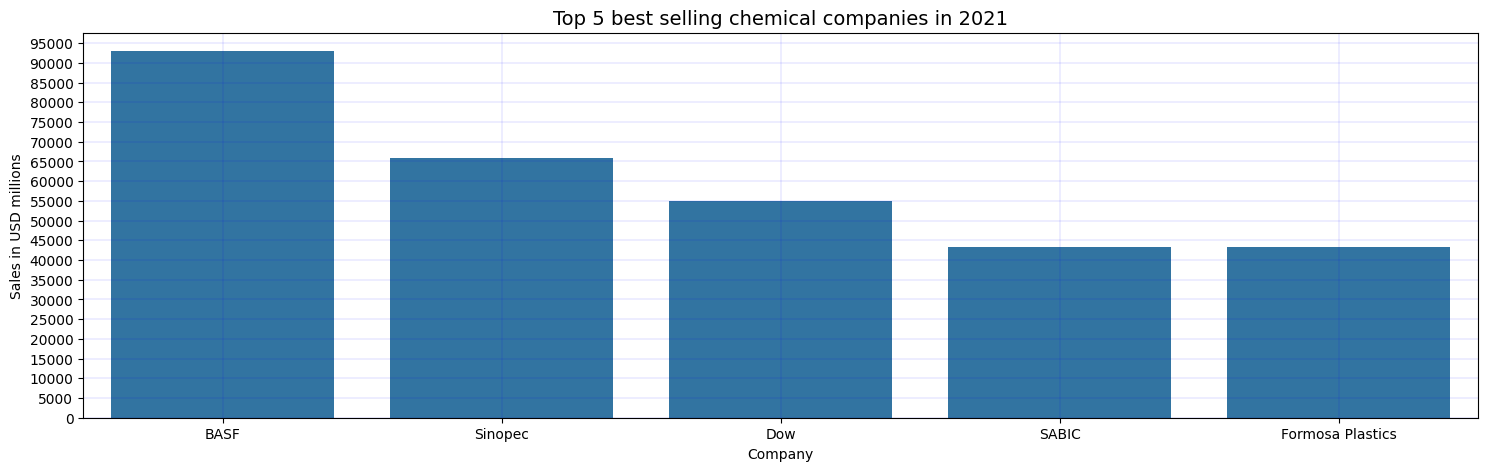

In [281]:
top_5_best_selling_companies_graph = plt.figure(figsize=(18, 5))
sns.barplot(data = df.iloc[0:5], x = "Company", y = "Sales in 2021 in USD millions")
plt.grid(color = "b", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Sales in USD millions")
plt.yticks(np.arange(0,100000,5000))
plt.title("Top 5 best selling chemical companies in 2021", size = 14)

* Growth distribution by company

In [282]:
growth_df = pd.pivot_table(df, values = ["Growth in 2021 in %", "Country"], index = "Company", aggfunc = "sum")
growth_df = growth_df.reindex(growth_df["Growth in 2021 in %"].sort_values(ascending = False).index)
growth_df

,Country,Growth in 2021 in %
Company,,
Ineos,United Kingdom,121.00
Wanhua,China,98.20
Braskem,Brazil,80.40
Chevron Phillips Chemical,United States,67.10
Hengyi Petrochemical,China,66.80
LyondellBasell Industries,United States,66.60
Reliance Industries,India,65.60
Nutrien,Canada,62.00
ExxonMobil,United States,59.60


Text(0.5, 1.0, 'Growth distribution by company in 2021')

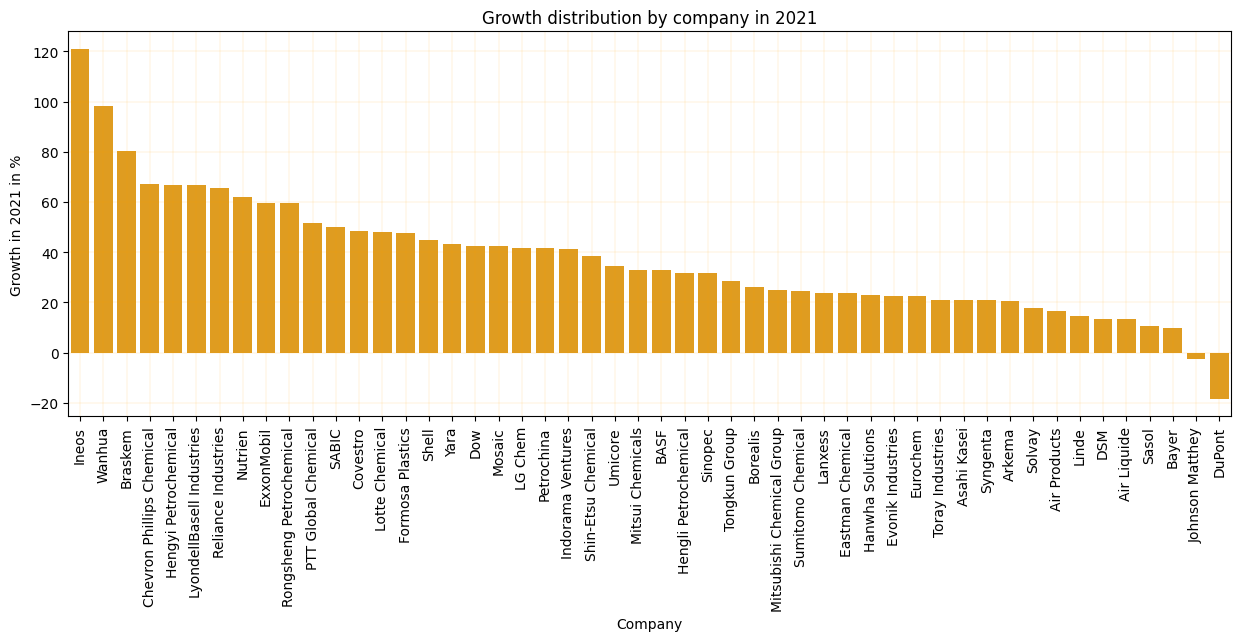

In [283]:
growth_graph = plt.figure(figsize = (15, 5))
sns.barplot(data = growth_df, x = "Company", y = "Growth in 2021 in %", color = "orange")
plt.grid(color = "orange", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Growth in 2021 in %")
plt.xticks(rotation = 90)
plt.title("Growth distribution by company in 2021")

* Top 5 fastest growing chemical companies in 2021

Text(0.5, 1.0, 'Top 5 fastest growing chemical companies in 2021')

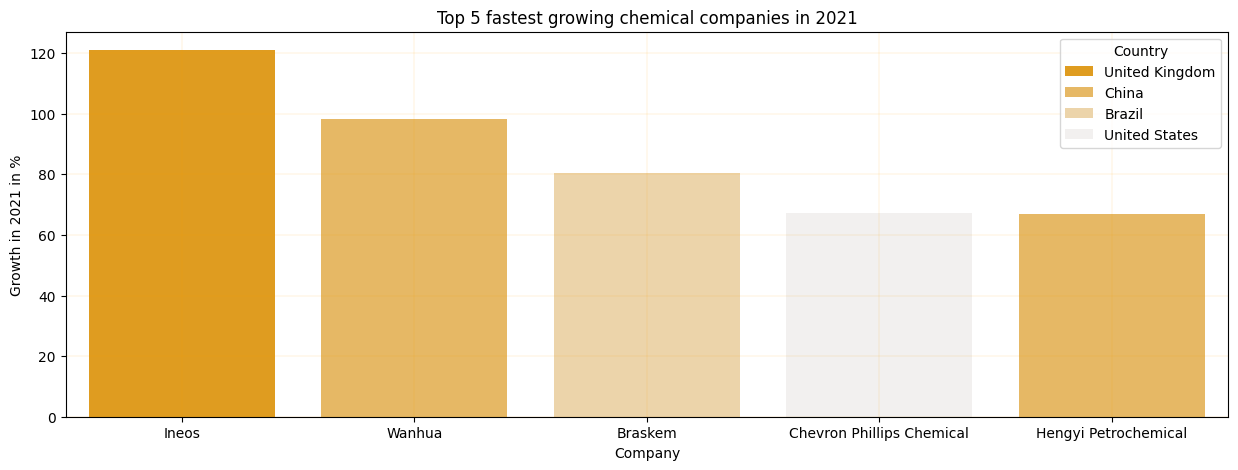

In [284]:
top_5_fastest_growing_companies_graph = plt.figure(figsize = (15, 5))
sns.barplot(data = growth_df.iloc[0:5], x = "Company", y = "Growth in 2021 in %", palette = "light:orange_r", hue = "Country")
plt.grid(color = "orange", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Growth in 2021 in %")
plt.title("Top 5 fastest growing chemical companies in 2021")

* Distribution of the most successful chemical producer companies by country

In [285]:
countries_df = df.groupby("Country")[["Company"]].count().sort_values(by = "Company", ascending = False)
countries_df

,Company
Country,
United States,8
China,7
Japan,6
Germany,5
South Korea,3
United Kingdom,3
Switzerland,2
Belgium,2
Thailand,2


Text(0.5, 1.0, 'Distribution of the most sucessful chemical producer companies by country')

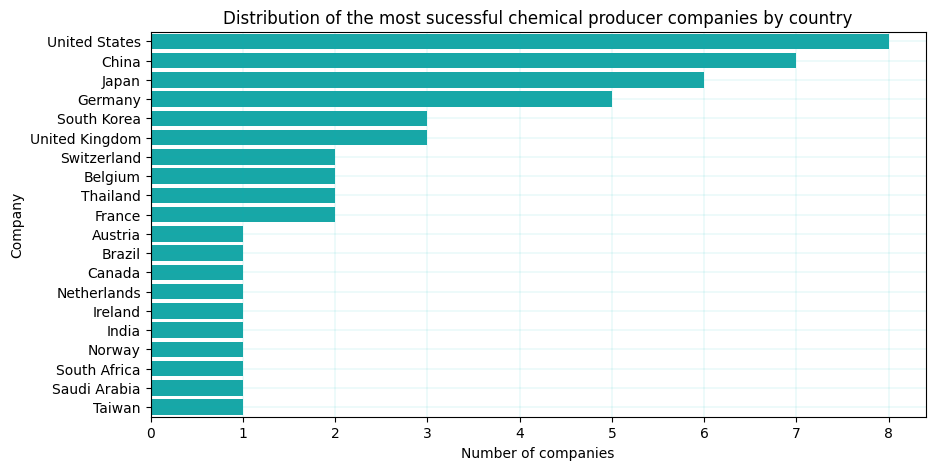

In [286]:
companies_worldwide_graph = plt.figure(figsize = (10, 5))
sns.barplot(data = countries_df, y = "Country", x = "Company", color = "c")
plt.grid(color = "c", linestyle = "-", linewidth = 0.1)
plt.xlabel("Number of companies")
plt.ylabel("Company")
plt.title("Distribution of the most sucessful chemical producer companies by country", size = 12)

### Analysis of German companies

* Top Best Selling German Chemical Companies in 2021

In [287]:
germany = df[df["Country"] == "Germany"]
germany

,Rank,Company,Sales in 2021 in USD millions,Growth in 2021 in %,Country
0,1,BASF,92982,32.9,Germany
20,21,Covestro,18813,48.5,Germany
22,23,Evonik Industries,17692,22.6,Germany
33,34,Bayer,12743,9.7,Germany
48,49,Lanxess,8940,23.8,Germany


Text(0.5, 1.0, 'Top Best Selling German Chemical Comapanies in 2021')

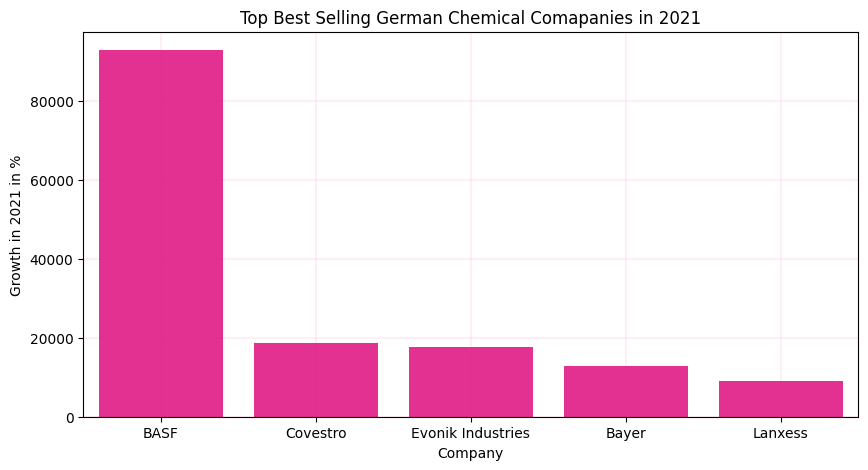

In [288]:
german_companies_by_sale_graph = plt.figure(figsize = (10, 5))
sns.barplot(data = germany, x = "Company", y = "Sales in 2021 in USD millions", color = "deeppink")
plt.grid(color = "deeppink", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Growth in 2021 in %")
plt.title("Top Best Selling German Chemical Comapanies in 2021")

* Top Fastest Growing German Chemical Companies in 2021

In [289]:
germany_growth_df = germany.sort_values(by = "Growth in 2021 in %", ascending = False)

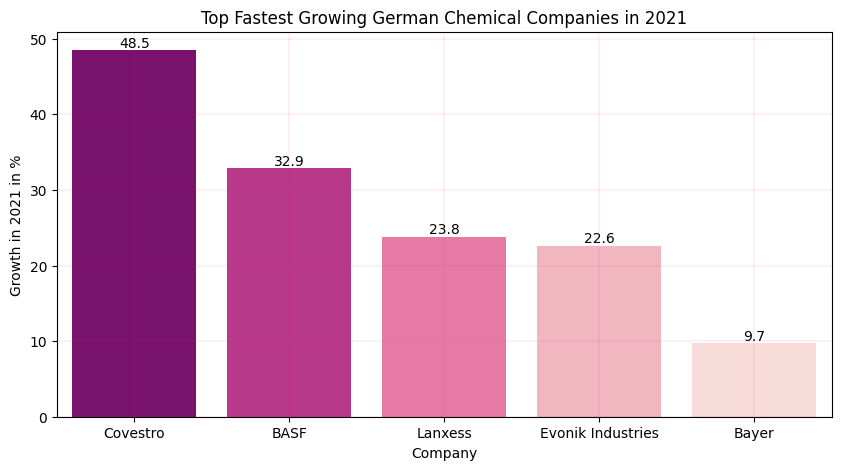

In [290]:
german_companies_by_growth_graph = plt.figure(figsize = (10, 5))
ax = sns.barplot(data = germany_growth_df, x = "Company", y = "Growth in 2021 in %", palette = "RdPu_r", hue = "Company")
plt.grid(color = "deeppink", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Growth in 2021 in %")
plt.title("Top Fastest Growing German Chemical Companies in 2021")
for i in ax.containers:
    ax.bar_label(i,)

## Conclusions:

### Top 5 best selling chemical companies worldwide
The chemical producers companies that perform the best in the year 2021 are:
* BASF
* Sinopec
* Dow
* SABIC
* Formosa Plastics

In [291]:
df.iloc[0:5]

,Rank,Company,Sales in 2021 in USD millions,Growth in 2021 in %,Country
0,1,BASF,92982,32.9,Germany
1,2,Sinopec,65848,31.9,China
2,3,Dow,54968,42.6,United States
3,4,SABIC,43230,50.1,Saudi Arabia
4,5,Formosa Plastics,43173,47.8,Taiwan


Text(0.5, 1.0, 'Top 5 best selling chemical companies in 2021')

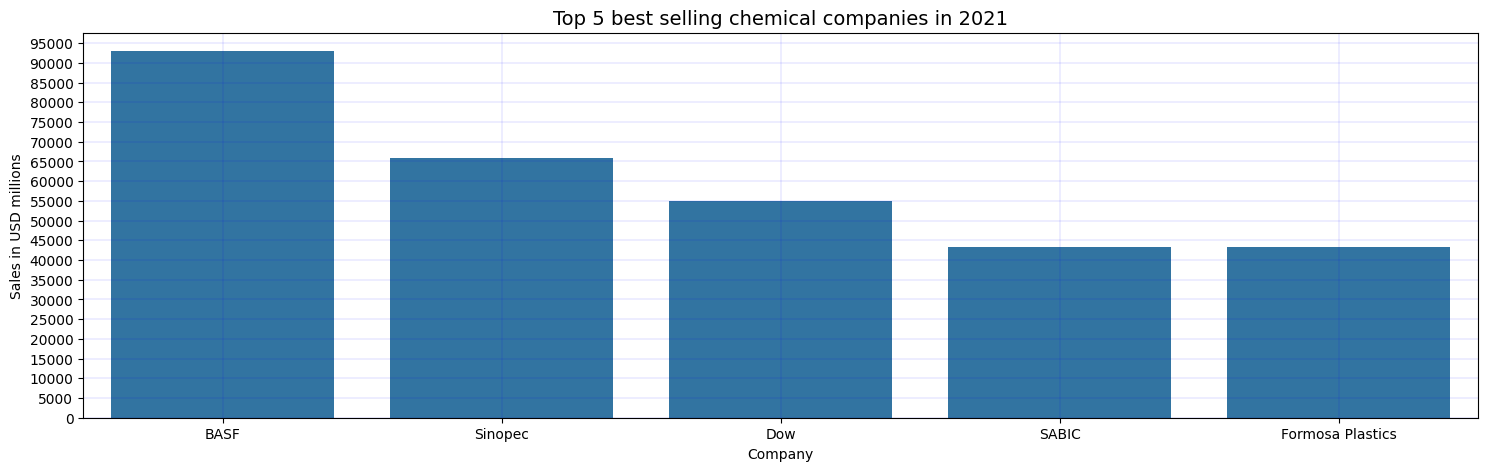

In [292]:
top_5_best_selling_companies_graph = plt.figure(figsize=(18, 5))
sns.barplot(data = df.iloc[0:5], x = "Company", y = "Sales in 2021 in USD millions")
plt.grid(color = "b", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Sales in USD millions")
plt.yticks(np.arange(0,100000,5000))
plt.title("Top 5 best selling chemical companies in 2021", size = 14)

### Top 5 fastest growing chemical companies worldwide
The chemical producers companies that perform the best in the year 2021 are:
* Ineos
* Wanhua
* Braskern
* Chevron Phillips Chemical
* Hengyi Petrochemical

In [293]:
growth_df.iloc[0:5]

,Country,Growth in 2021 in %
Company,,
Ineos,United Kingdom,121.0
Wanhua,China,98.2
Braskem,Brazil,80.4
Chevron Phillips Chemical,United States,67.1
Hengyi Petrochemical,China,66.8


Text(0.5, 1.0, 'Top 5 fastest growing chemical companies in 2021')

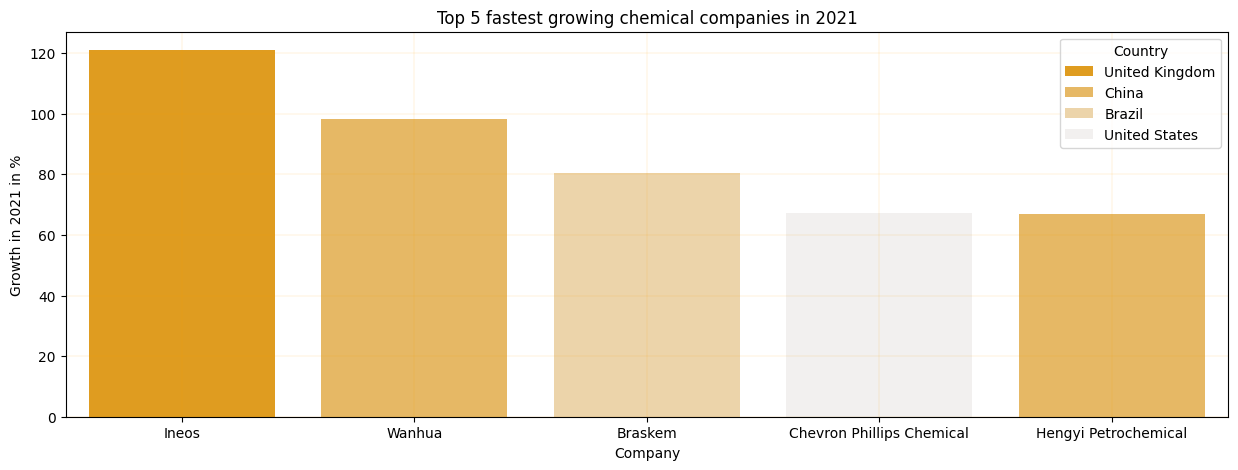

In [294]:
top_5_fastest_growing_companies_graph = plt.figure(figsize = (15, 5))
sns.barplot(data = growth_df.iloc[0:5], x = "Company", y = "Growth in 2021 in %", palette = "light:orange_r", hue = "Country")
plt.grid(color = "orange", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Growth in 2021 in %")
plt.title("Top 5 fastest growing chemical companies in 2021")

### Global distribution of top-performing chemical companies
The United States is the country with the most chemical companies on the list of the world's 50 largest chemical producers, followed by China, Japan and Germany.



Text(0.5, 1.0, 'Distribution of the most sucessful chemical producer companies by country')

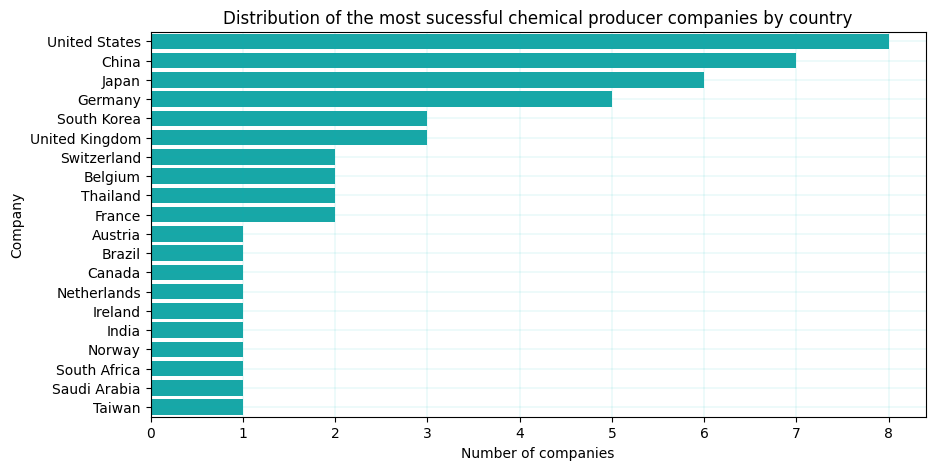

In [295]:
companies_worldwide_graph = plt.figure(figsize = (10, 5))
sns.barplot(data = countries_df, y = "Country", x = "Company", color = "c")
plt.grid(color = "c", linestyle = "-", linewidth = 0.1)
plt.xlabel("Number of companies")
plt.ylabel("Company")
plt.title("Distribution of the most sucessful chemical producer companies by country", size = 12)

### Top best selling German chemical companies
The chemical producers companies that perform the best in the year 2021 are:
* BASF
* Covestro
* Evonik Industries
* Bayer
* Lanxess

In [296]:
germany

,Rank,Company,Sales in 2021 in USD millions,Growth in 2021 in %,Country
0,1,BASF,92982,32.9,Germany
20,21,Covestro,18813,48.5,Germany
22,23,Evonik Industries,17692,22.6,Germany
33,34,Bayer,12743,9.7,Germany
48,49,Lanxess,8940,23.8,Germany


Text(0.5, 1.0, 'Top Best Selling German Chemical Comapanies in 2021')

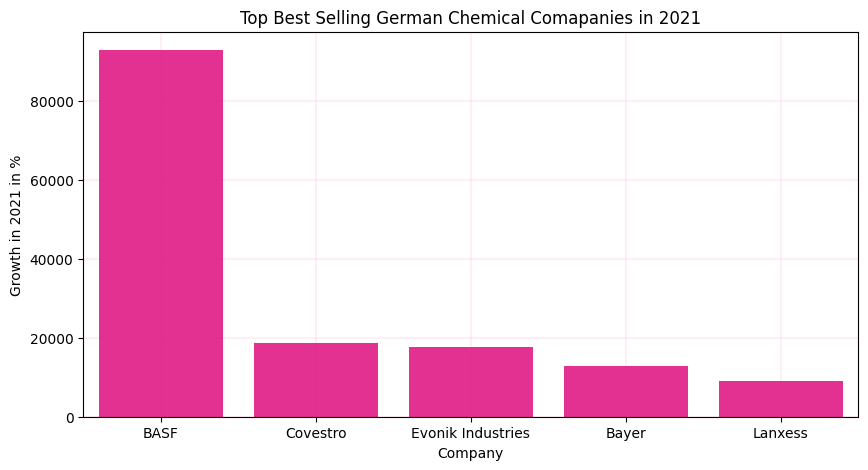

In [297]:
german_companies_by_sale_graph = plt.figure(figsize = (10, 5))
sns.barplot(data = germany, x = "Company", y = "Sales in 2021 in USD millions", color = "deeppink")
plt.grid(color = "deeppink", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Growth in 2021 in %")
plt.title("Top Best Selling German Chemical Comapanies in 2021")

### Top fastest growing German chemical companies
The chemical producers companies that perform the best in the year 2021 are:
* BASF
* Covestro
* Evonik Industries
* Bayer
* Lanxess

In [298]:
germany_growth_df

,Rank,Company,Sales in 2021 in USD millions,Growth in 2021 in %,Country
20,21,Covestro,18813,48.5,Germany
0,1,BASF,92982,32.9,Germany
48,49,Lanxess,8940,23.8,Germany
22,23,Evonik Industries,17692,22.6,Germany
33,34,Bayer,12743,9.7,Germany


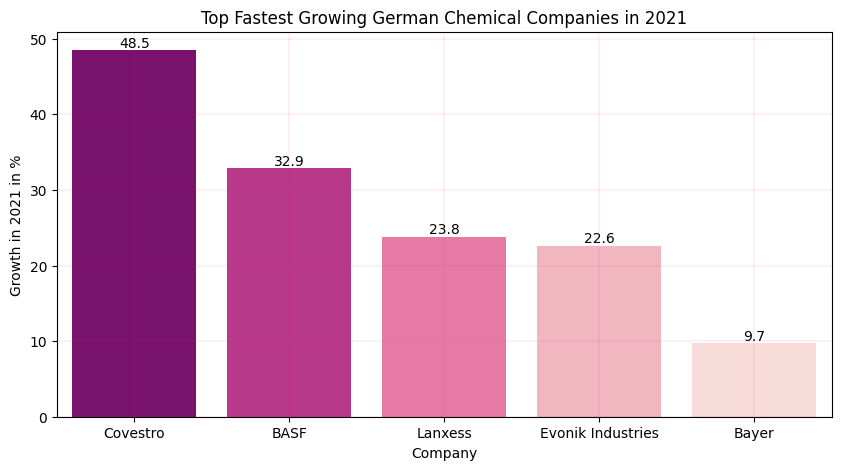

In [299]:
german_companies_by_growth_graph = plt.figure(figsize = (10, 5))
ax = sns.barplot(data = germany_growth_df, x = "Company", y = "Growth in 2021 in %", palette = "RdPu_r", hue = "Company")
plt.grid(color = "deeppink", linestyle = "-", linewidth = 0.1)
plt.xlabel("Company")
plt.ylabel("Growth in 2021 in %")
plt.title("Top Fastest Growing German Chemical Companies in 2021")
for i in ax.containers:
    ax.bar_label(i,)